<a href="https://colab.research.google.com/github/machinelearnerme/BigDataAndAI/blob/main/BigData_ASsignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
from google.colab import files
uploaded = files.upload()


Saving uk_retail_realistic_350k.csv to uk_retail_realistic_350k.csv


In [18]:
df = pd.read_csv("uk_retail_realistic_350k.csv")
df.head()


,InvoiceNo,InvoiceDate,ProductID,ProductCategory,Quantity,UnitPrice,CustomerID,Channel,Region,Revenue,City
0,1,2021-09-12 14:00:00,1067,Home,2,25.89,18469,In-Store,East,51.78,Norwich
1,2,2020-10-20 03:00:00,1021,Food,3,23.87,16617,Online,East,71.61,Ipswich
2,3,2019-02-05 20:00:00,1063,Home,9,248.23,12863,Online,North,2234.07,Manchester
3,4,2019-08-13 14:00:00,1026,Food,5,11.27,21496,Online,South,56.35,London
4,5,2021-06-17 23:00:00,1097,Food,9,11.53,12738,Online,North,103.77,Manchester


In [23]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [24]:
df.head()

,InvoiceNo,InvoiceDate,ProductID,ProductCategory,Quantity,UnitPrice,CustomerID,Channel,Region,Revenue,City
0,1,2021-09-12 14:00:00,1067,Home,2,25.89,18469,In-Store,East,51.78,Norwich
1,2,2020-10-20 03:00:00,1021,Food,3,23.87,16617,Online,East,71.61,Ipswich
2,3,2019-02-05 20:00:00,1063,Home,9,248.23,12863,Online,North,2234.07,Manchester
3,4,2019-08-13 14:00:00,1026,Food,5,11.27,21496,Online,South,56.35,London
4,5,2021-06-17 23:00:00,1097,Food,9,11.53,12738,Online,North,103.77,Manchester


In [29]:
monthly_revenue = (
    df
    .set_index("InvoiceDate")
)
monthly_revenue.index = pd.to_datetime(monthly_revenue.index) # Ensure index is DatetimeIndex
monthly_revenue = monthly_revenue.resample("ME")["Revenue"].sum()

monthly_revenue

,Revenue
InvoiceDate,
2019-01-31,4328313.18
2019-02-28,3973978.56
2019-03-31,4197571.20
2019-04-30,4175163.35
2019-05-31,4340795.96
2019-06-30,4205821.71
2019-07-31,4348748.34
2019-08-31,4509791.38
2019-09-30,4191585.58


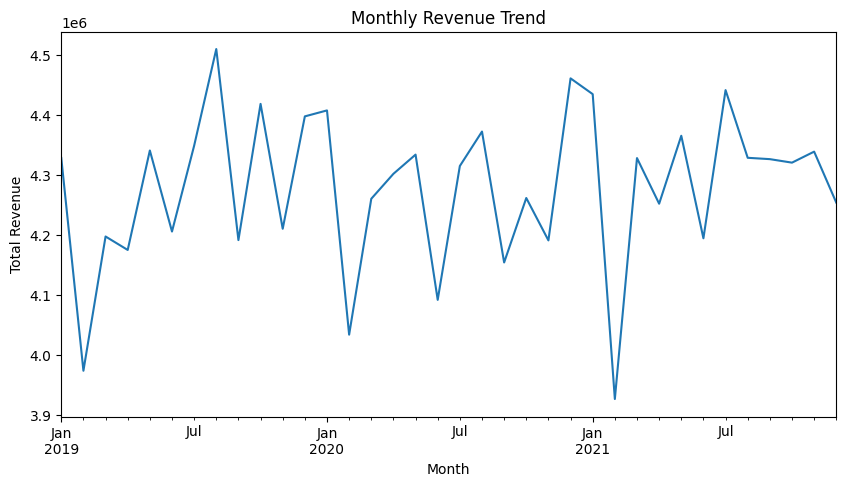

In [30]:
import matplotlib.pyplot as plt

monthly_revenue.plot(
    figsize=(10,5),
    title="Monthly Revenue Trend"
)

plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()


Year-over-Year Monthly Revenue

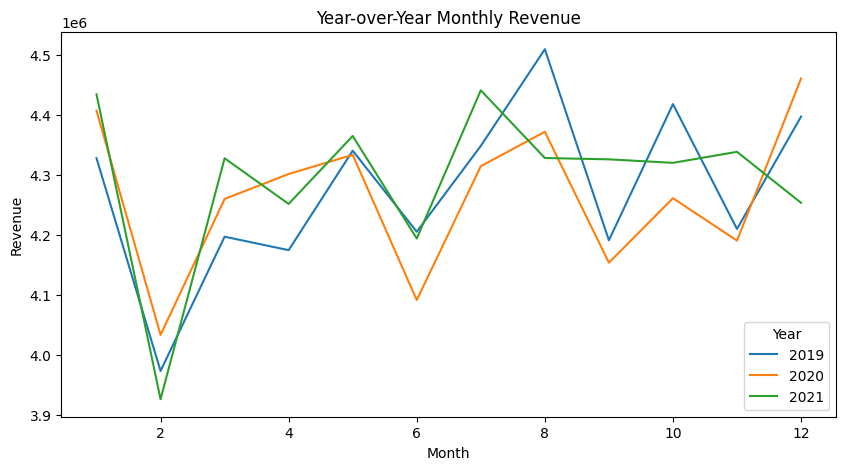

In [38]:
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month

yoy_revenue = (
    df.groupby(["Year", "Month"])["Revenue"]
      .sum()
      .unstack(level=0)
)

yoy_revenue.plot(figsize=(10,5))
plt.title("Year-over-Year Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


In [31]:
category_revenue = (
    df
    .groupby("ProductCategory")["Revenue"]
    .sum()
    .sort_values(ascending=False)
)

category_revenue


,Revenue
ProductCategory,
Home,56023820.33
Electronics,42875664.91
Clothing,20001557.24
Toys,18362121.03
Food,16731878.53


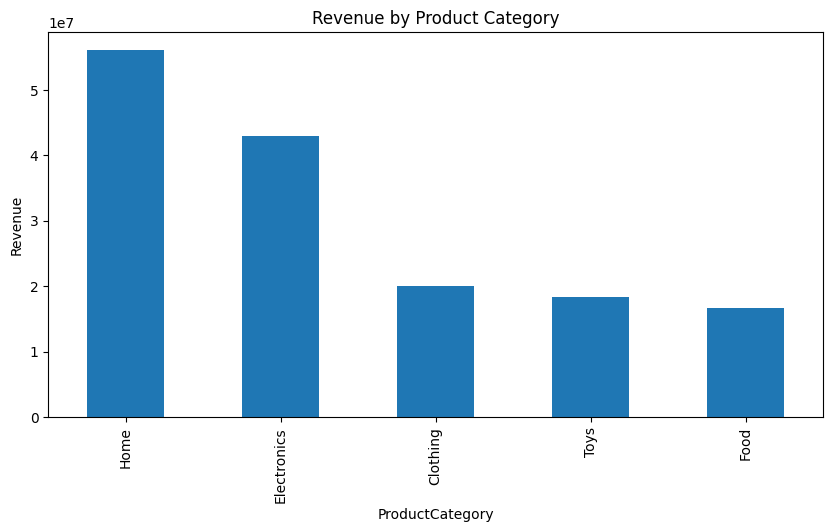

In [32]:
category_revenue.plot(
    kind="bar",
    figsize=(10,5),
    title="Revenue by Product Category"
)
plt.ylabel("Revenue")
plt.show()


Top 10 Products by Revenue

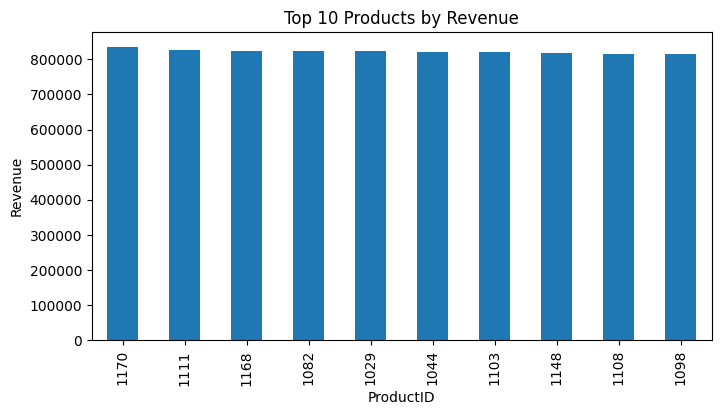

In [39]:
top_products = (
    df.groupby("ProductID")["Revenue"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_products.plot(kind="bar", figsize=(8,4))
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.show()


In [33]:
channel_revenue = (
    df
    .groupby("Channel")["Revenue"]
    .sum()
)

channel_revenue



,Revenue
Channel,
In-Store,4.899559e+07
Online,1.049994e+08


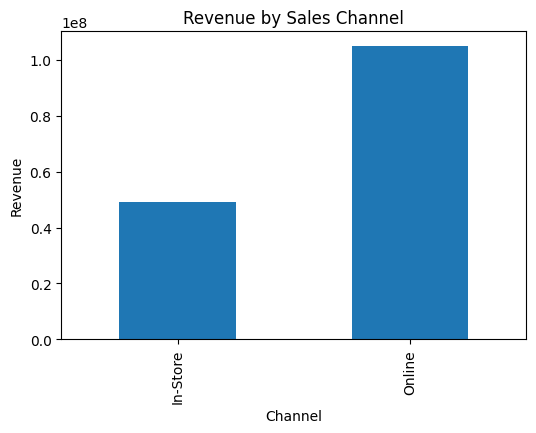

In [34]:
channel_revenue.plot(
    kind="bar",
    figsize=(6,4),
    title="Revenue by Sales Channel"
)
plt.ylabel("Revenue")
plt.show()


Channel Revenue Share Over Time

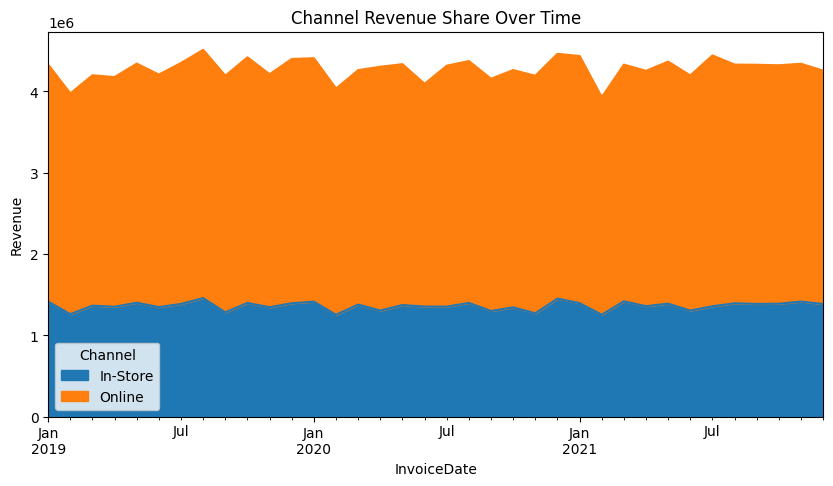

In [40]:
channel_monthly = (
    df.groupby([pd.Grouper(key="InvoiceDate", freq="ME"), "Channel"])["Revenue"]
      .sum()
      .unstack()
)

channel_monthly.plot(kind="area", stacked=True, figsize=(10,5))
plt.title("Channel Revenue Share Over Time")
plt.ylabel("Revenue")
plt.show()


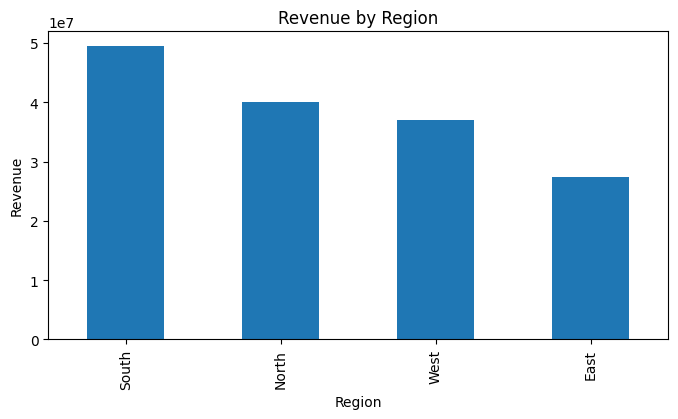

In [41]:
region_revenue = (
    df.groupby("Region")["Revenue"]
      .sum()
      .sort_values(ascending=False)
)

region_revenue.plot(kind="bar", figsize=(8,4))
plt.title("Revenue by Region")
plt.ylabel("Revenue")
plt.show()


In [36]:
customer_metrics = (
    df
    .groupby("CustomerID")
    .agg(
        total_orders=("InvoiceNo", "nunique"),
        total_revenue=("Revenue", "sum")
    )
)

customer_metrics.head()


,total_orders,total_revenue
CustomerID,,
10000,20,10115.14
10001,14,7983.27
10002,11,3090.81
10003,17,6471.78
10004,16,6329.12


In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = customer_metrics[["total_orders", "total_revenue"]]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
customer_metrics["CustomerSegment"] = kmeans.fit_predict(scaled_features)

customer_metrics.head()


,total_orders,total_revenue,CustomerSegment
CustomerID,,,
10000,20,10115.14,1
10001,14,7983.27,0
10002,11,3090.81,2
10003,17,6471.78,0
10004,16,6329.12,0


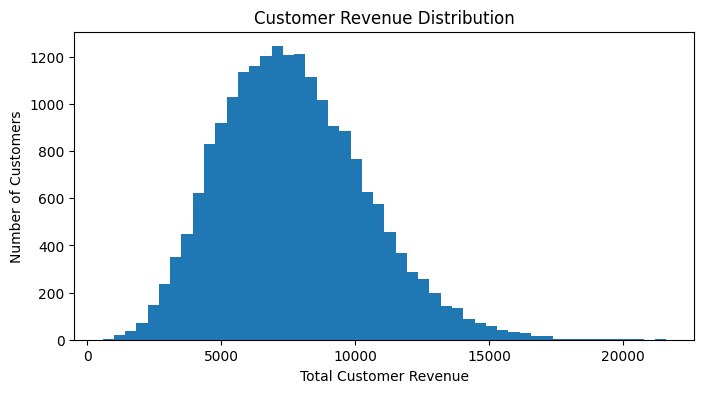

In [42]:
customer_revenue = (
    df.groupby("CustomerID")["Revenue"]
      .sum()
)

customer_revenue.plot(kind="hist", bins=50, figsize=(8,4))
plt.title("Customer Revenue Distribution")
plt.xlabel("Total Customer Revenue")
plt.ylabel("Number of Customers")
plt.show()
